In [1]:
import math, random
from scipy.stats import norm, expon, truncnorm
import numpy as np
from scipy.integrate import simps
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
def x_mod(accion, x):
    if accion == 0:
        y = 1.12*x+15
    elif accion == 1:
        y = 1.05*x+18
    elif accion == 2:
        y = 1.1*x
    elif accion == 3:
        y = x + 6
    elif accion == 4:
        n = random.randint(1, 2)
        if n ==1:
            y = 1.2*x
        else:
            y = x
    elif accion == 5:
        y = x
    return y



def x_mod_inv(accion, y, lluvia):
    if accion == 0:
        x = (y-15) / 1.12
    elif accion == 1:
        x = (y-18) / 1.1
    elif accion == 2:
        x = y / 1.1
    elif accion == 3:
        x = y - 6
    elif accion == 4:
        if lluvia == True:
            x = y / 1.2
        elif lluvia == False:
            x = y
    elif accion == 5:
        x = y
    return x    



def coste(accion):
    if accion == 0:
        coste = 30
    elif accion == 1:
        coste = 30
    elif accion == 2:
        coste = 6
    elif accion == 3:
        coste = 6
    elif accion == 4:
        coste = 6
    elif accion == 5:
        coste = 0
    return coste
    

    

def h_i_a_i(y,theta,accion):
    mu = x_mod(accion, theta - 120)
    sigma = mu / chi_h_i_a_i
    prob=norm(mu, sigma)
    return prob.pdf(y)

In [3]:
# Generación P_A^i(d|y)
import time
inicio = time.time()
N1 = 200  # simulaciones
N2 = 1000  # muestras
Y = np.linspace(0.1,150, 1001)
denominador = np.zeros(len(Y))
numerador = np.zeros(len(Y))
theta_0 = 180
X = {}
cubic_spline = {}

for n1 in range(N1):
    unif_P_i_a_i_theta = np.random.uniform(25, 35)
    beta_P_i_a_i_theta = 30 / (unif_P_i_a_i_theta**2)
    alfa_P_i_a_i_theta = 30 * beta_P_i_a_i_theta
    dir_P_i_a_i_a = np.random.dirichlet([1,1,1,1,1,1])
    chi_h_i_a_i = np.random.chisquare(df=10)

    theta_P_i_a_i = 120 + np.random.gamma(shape=alfa_P_i_a_i_theta, scale=1/beta_P_i_a_i_theta, size=N2)
    a_P_i_a_i = np.random.choice(len(dir_P_i_a_i_a), size=N2, p=dir_P_i_a_i_a)

    valores_h = np.array([h_i_a_i(Y, theta, accion) for theta, accion in zip(theta_P_i_a_i, a_P_i_a_i)])

    denominador = valores_h.sum(axis=0)
    numerador = np.sum(valores_h * (theta_P_i_a_i > theta_0)[:, np.newaxis], axis=0)
    if np.isnan(denominador).any():
        raise ValueError("Denominador tiene valores NaN. Reiniciar cálculo.")
    X[n1] = np.where(denominador > 0, numerador / denominador, 0)
    cubic_spline[n1] = CubicSpline(Y, X[n1], extrapolate=False)
final = time.time()
print('Tiempo:', final - inicio)

Tiempo: 138.29950404167175


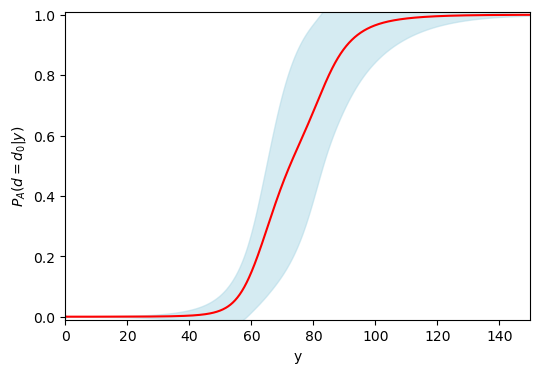

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Definición de Y y x_plot
Y = np.linspace(0.1,150, 1001)
x_plot = np.linspace(min(Y), max(Y), 1000)

# Generación de las curvas
curvas = np.array([cubic_spline[i](x_plot) for i in range(len(cubic_spline))])

# Cálculo de la media y la desviación estándar en cada punto x_plot
media_curvas = np.mean(curvas, axis=0)
std_curvas = np.std(curvas, axis=0)

# Gráfico de la media y el área sombreada
plt.figure(figsize=(6, 4)) 
plt.xlabel('y')
plt.ylabel(r'$P_A(d=d_0|y)$')

# Pinta la media de las curvas en rojo
plt.plot(x_plot, media_curvas, color='red')

# Rellena el área con dos desviaciones estándar alrededor de la media
plt.fill_between(x_plot, media_curvas - 2 * std_curvas, media_curvas + 2 * std_curvas, color='lightblue', alpha=0.5)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlim(0, 150)
plt.ylim(-0.01, 1.01)
plt.show()


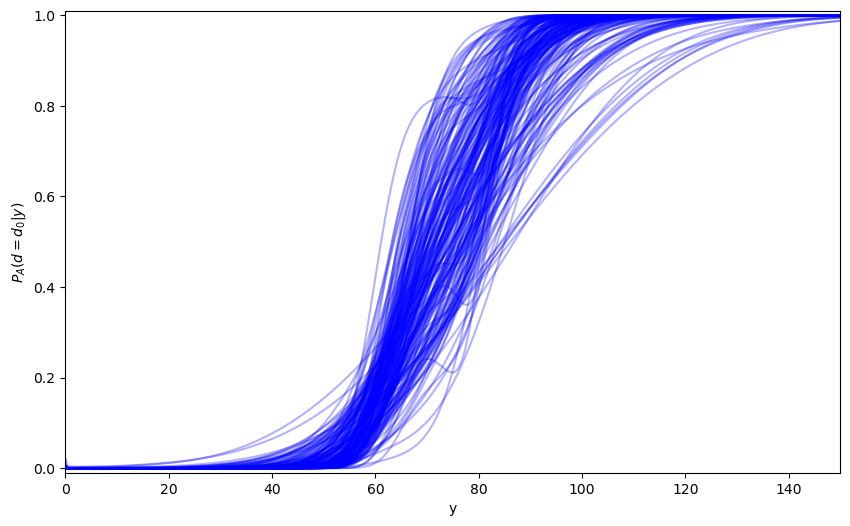

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Definición de Y y x_plot
Y = np.linspace(0.1,150, 1001)
x_plot = np.linspace(min(Y), max(Y), 1000)

# Gráfico de todas las curvas
plt.figure(figsize=(10, 6))
plt.xlabel('y')
plt.ylabel(r'$P_A(d=d_0|y)$')

# Itera a través de todas las curvas en cubic_spline y gráficas
for i in range(len(cubic_spline)):
    y_plot = cubic_spline[i](x_plot)
    plt.plot(x_plot, y_plot, color='blue', alpha=0.3)  # Usa alpha para hacer las líneas semitransparentes

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlim(0, 150)
plt.ylim(-0.01, 1.01)
# plt.title('Todas las curvas de $P_A(d=d_0|y)$ generadas usando splines cúbicos')
plt.show()


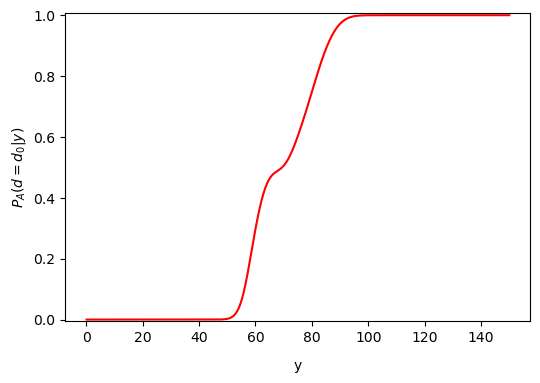

In [4]:
x_plot = np.linspace(min(Y), max(Y), 1000)
y_plot = cubic_spline[0](x_plot)

# Set the figure size
plt.figure(figsize=(6, 4))  # Adjust the width and height as needed

# plt.scatter(Y, X[0])
plt.plot(x_plot, y_plot, color='red')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.ylim(-0.006, 1.006)
plt.xlabel("y", labelpad=10)
plt.ylabel(r'$P_A(d=d_0|y)$')
plt.show()

In [5]:
# Generación de P_i(a)

def f_optim(a):
    y = [x_mod(a, x) for x in x_P_a_i]
    output = np.mean( (coste(a)-300) * cubic_spline[n]( np.clip(y, min(Y), max(Y)) ) ) + np.mean( coste(a) * (1-cubic_spline[n](np.clip(y, min(Y), max(Y)))) ) 
    return output



N3 = 5000
N4 = 1000 # muestras en la integral
A = []
for n3 in range(N3):
    unif_P_i_a_i_theta = np.random.uniform(25, 35)
    beta_P_i_a_i_theta = 30 / (unif_P_i_a_i_theta**2)
    alfa_P_i_a_i_theta = 30 * beta_P_i_a_i_theta
    theta_P_a_i = 120 + np.random.gamma(shape=alfa_P_i_a_i_theta, scale=1/beta_P_i_a_i_theta, size=N4)
    mu_P_a_i_x = np.random.normal(theta_P_a_i-120, (theta_P_a_i-120)/50)
    chi_sigma_P_a_i_x = np.random.chisquare(df=10)
    sigma_P_a_i_x = (theta_P_a_i-120)/chi_sigma_P_a_i_x
    x_P_a_i = np.random.normal(mu_P_a_i_x, sigma_P_a_i_x)
    n = np.random.randint(0, N1)
    valores_f = [f_optim(a) for a in range(6)]
    a = np.argmin(valores_f)
    A.append(a)

In [6]:
from collections import Counter
counts = Counter(A)

# Calculate total number of elements
total_elements = len(A)

# Calculate percentages
percentages = {key: count / total_elements * 100 for key, count in counts.items()}

# Print the percentages
print(percentages)

{0: 11.379999999999999, 2: 21.5, 4: 33.58, 5: 24.62, 3: 6.18, 1: 2.74}


In [7]:
np.ones(len(A)) / len(A)

array([0.0002, 0.0002, 0.0002, ..., 0.0002, 0.0002, 0.0002])

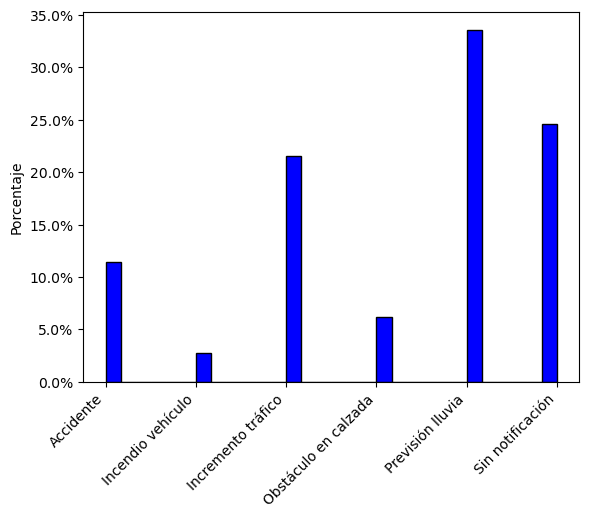

In [8]:
dict_acciones = {
    0: 'Accidente',
    1: 'Incendio vehículo',
    2: 'Incremento tráfico',
    3: 'Obstáculo en calzada',
    4: 'Previsión lluvia',
    5: 'Sin notificación'
}

plt.hist(A, weights=np.ones(len(A)) / len(A), bins=30, color='blue', edgecolor='black')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(list(dict_acciones.keys()), list(dict_acciones.values()), rotation=45, ha='right')
plt.ylabel('Porcentaje')
plt.show()

In [10]:
# Cálculo de d(y)
N3 = 5000
theta_0 = 180
N5 = 50000 # muestras en la integral
aux_acciones = np.random.randint(0, N3, N5)
acciones = np.array([A[n] for n in aux_acciones])
theta_i = 120 + np.random.exponential(scale = 30, size=N5)
p_i_x_theta=norm(theta_i-120,(theta_i-120)/10)
costes = 400 * ( (theta_i>theta_0) & (theta_i<(theta_0+60)) ) + 700 * ( (theta_i>theta_0+60) & (theta_i<(theta_0+120)) ) + 1000 * (theta_i>theta_0+120) 

for y in np.linspace(0.25,200,800):
    x_true = np.array([x_mod_inv(a,y,True) for a in acciones])
    x_false = np.array([x_mod_inv(a,y,False) for a in acciones])
    print( y, 1/(2*N5) * np.sum( 300 * p_i_x_theta.pdf(np.array([x_mod_inv(a,y,True) for a in acciones]))) + 1/(2*N5) * np.sum( 300 * p_i_x_theta.pdf(np.array([x_mod_inv(a,y,False) for a in acciones]))) )


0.25 8.35949895953944
0.5 8.788967277133995
0.75 8.70219556655291
1.0 7.71834043342914
1.25 8.11495586158239
1.5 7.729524479906967
1.75 7.695075735734514
2.0 8.037591529464553
2.25 8.177844043553861
2.5 7.847068528089264
2.75 7.499305758033881
3.0 7.285198390905571
3.25 7.174826187137128
3.5 7.111190538543377
3.75 7.052351580003254
4.0 7.01012819386891
4.25 6.987727351819475
4.5 6.969801344147493
4.75 6.93494277192373
5.0 6.871203328027105
5.25 6.78995469075929
5.5 6.713993671048081
5.75 6.655546582205029
6.0 6.612424024792572
6.25 7.079347251721156
6.5 7.169763920988171
6.75 7.206987079330476
7.0 7.096512429216165
7.25 7.2281452356339635
7.5 7.194589800225506
7.75 6.980054908000675
8.0 6.82854380380825
8.25 6.804965190307144
8.5 6.817684098088995
8.75 6.782378356573361
9.0 6.684389911203368
9.25 6.582443027488439
9.5 6.515787884253992
9.75 6.481622215865978
10.0 6.462941845168444
10.25 6.446306058971222
10.5 6.418851950549253
10.75 6.376285834792212
11.0 6.32610614708687
11.25 6.27533

86.5 0.7288365495554368
86.75 0.7234187845315092
87.0 0.7180614965063179
87.25 0.7127634281833738
87.5 0.7075233021611229
87.75 0.7023398248790294
88.0 0.6972116904304597
88.25 0.6921375842392148
88.5 0.6871161865975781
88.75 0.6821461760646004
89.0 0.6772262327240404
89.25 0.6723550413019489
89.5 0.6675312941442848
89.75 0.6627536940552605
90.0 0.658020956997271
90.25 0.6533318146533587
90.5 0.6486850168531377
90.75 0.6440793338630414
91.0 0.6395135585416225
91.25 0.6349865083604753
91.5 0.630497027291178
91.75 0.6260439875584594
92.0 0.6216262912596455
92.25 0.6172428718502833
92.5 0.6128926954957452
92.75 0.6085747622885604
93.0 0.6042881073312135
93.25 0.6000318016842126
93.5 0.5958049531793543
93.75 0.5916067070982975
94.0 0.5874362467168097
94.25 0.583292793715372
94.5 0.5791756084571911
94.75 0.5750839901350966
95.0 0.5710172767892712
95.25 0.5669748451982549
95.5 0.5629561106462084
95.75 0.5589605265699547
96.0 0.5549875840898736
96.25 0.551036811429275
96.5 0.5471077732274046


166.0 0.06742262247293673
166.25 0.06690652556884777
166.5 0.06639380392400848
166.75 0.06588444343613256
167.0 0.06537843020653047
167.25 0.06487575053004316
167.5 0.06437639088508376
167.75 0.06388033792379653
168.0 0.06338757846234275
168.25 0.0628980994713227
168.5 0.062411888066343985
168.75 0.06192893149874486
169.0 0.06144921714648227
169.25 0.06097273250519389
169.5 0.06049946517944223
169.75 0.06002940287414993
170.0 0.05956253338623417
170.25 0.0590988445964475
170.5 0.05863832446143255
170.75 0.058180961005997324
171.0 0.057726742315616905
171.25 0.05727565652916718
171.5 0.056827691831895885
171.75 0.056382836448634656
172.0 0.055941078637256225
172.25 0.055502406682379594
172.5 0.05506680888932567
172.75 0.054634273578324996
173.0 0.054204789078978605
173.25 0.053778343724972616
173.5 0.053354925849045984
173.75 0.052934523778211055
174.0 0.052517125829224964
174.25 0.0521027203043099
174.5 0.05169129548712009
174.75 0.0512828396389514
175.0 0.05087734099519067
175.25 0.05

In [11]:
costes[p_i_x_theta.pdf(np.array([x_mod_inv(a,110,False) for a in acciones]))>0.01]

array([400, 400, 700, ..., 400, 400, 400])

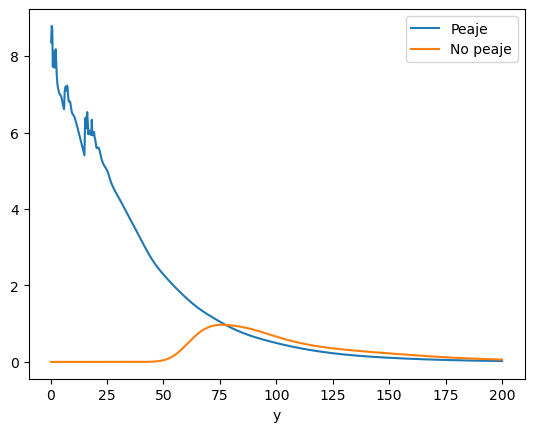

In [12]:
# Values for y
y_values = np.linspace(0.25, 200, 800)

# Calculate the results
results_no_peaje = [(1/2 * np.dot( costes , p_i_x_theta.pdf(np.array([x_mod_inv(a,y,True) for a in acciones]))) + 1/2 * np.dot( costes , p_i_x_theta.pdf(np.array([x_mod_inv(a,y,False) for a in acciones]))))/N5 for y in y_values]
results_peaje = [(1/2 * np.sum( 300 * p_i_x_theta.pdf(np.array([x_mod_inv(a,y,True) for a in acciones]))) + 1/2 * np.sum( 300 * p_i_x_theta.pdf(np.array([x_mod_inv(a,y,False) for a in acciones]))))/N5 for y in y_values]

# Create a plot
plt.plot(y_values, results_peaje, label='Peaje')
plt.plot(y_values, results_no_peaje, label='No peaje')


# Add labels and title
plt.xlabel('y')
# plt.ylabel('Result')
#plt.title('Plot of Results')

# Add a legend
plt.legend()

# Show the plot
plt.show()

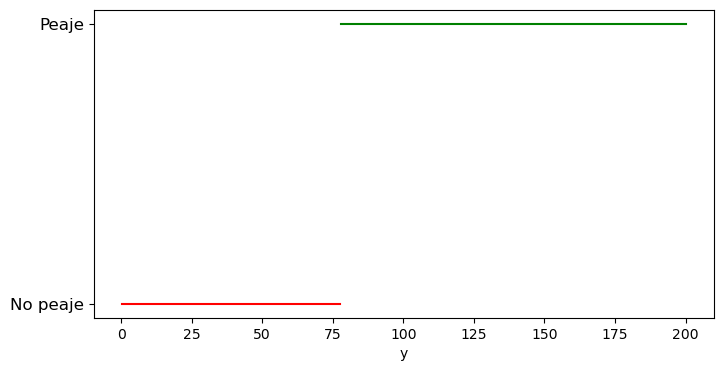

In [13]:

# Calculate the results
peaje = np.array(results_peaje) < np.array(results_no_peaje)

plt.figure(figsize=(8, 4))


# Create a plot with non-continuous line segments
plt.plot(y_values[peaje], peaje[peaje], color='green', label='Peaje')
plt.plot(y_values[~peaje], peaje[~peaje], color='red', label='No peaje')

# Add labels and title
plt.xlabel('y')

# Customize y-axis labels
plt.yticks([0, 1], ['No peaje', 'Peaje'], fontsize=12)


# Show the plot
plt.show()


In [14]:
[[y_values[n], peaje[n]] for n in range(101)]

[[0.25, False],
 [0.5, False],
 [0.75, False],
 [1.0, False],
 [1.25, False],
 [1.5, False],
 [1.75, False],
 [2.0, False],
 [2.25, False],
 [2.5, False],
 [2.75, False],
 [3.0, False],
 [3.25, False],
 [3.5, False],
 [3.75, False],
 [4.0, False],
 [4.25, False],
 [4.5, False],
 [4.75, False],
 [5.0, False],
 [5.25, False],
 [5.5, False],
 [5.75, False],
 [6.0, False],
 [6.25, False],
 [6.5, False],
 [6.75, False],
 [7.0, False],
 [7.25, False],
 [7.5, False],
 [7.75, False],
 [8.0, False],
 [8.25, False],
 [8.5, False],
 [8.75, False],
 [9.0, False],
 [9.25, False],
 [9.5, False],
 [9.75, False],
 [10.0, False],
 [10.25, False],
 [10.5, False],
 [10.75, False],
 [11.0, False],
 [11.25, False],
 [11.5, False],
 [11.75, False],
 [12.0, False],
 [12.25, False],
 [12.5, False],
 [12.75, False],
 [13.0, False],
 [13.25, False],
 [13.5, False],
 [13.75, False],
 [14.0, False],
 [14.25, False],
 [14.5, False],
 [14.75, False],
 [15.0, False],
 [15.25, False],
 [15.5, False],
 [15.75, False],